In [1]:
%matplotlib notebook 
#Para que se puedan manipular las gráficas en la ventana

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import scipy.special as sc
import numpy as np
from pandas import DataFrame


<IPython.core.display.Javascript object>


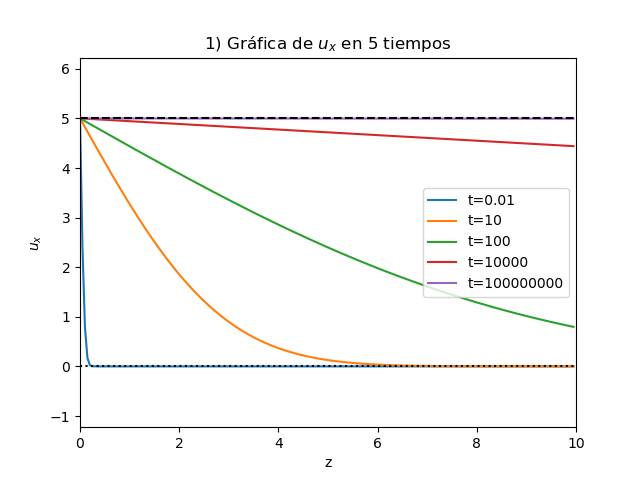

In [34]:
#GRAFICANDO LINEAS DE CORRIENTE
A=10
U=5
s=0.05
Z = np.arange(0, A, s)

for t in [0.01,10,100,10000,100000000]:
    ux = U*(1-sc.erf(Z/np.sqrt(t))) #Define ux como funcion en x, no pone la dependencia en y
    plt.plot(Z, ux, label='t='+str(t))
    
    plt.legend()
    plt.axis('equal')
    plt.axis([0, A, 0, 5])
    plt.xlabel('z')
    plt.ylabel(r'$u_{x}$')
    plt.title(r'1) Gráfica de $u_{x}$ en 5 tiempos')
    
#GRAFICAS DE REFERENCIA
ux=U+Z-Z
plt.plot(Z,ux,'k--')

ux=0+Z-Z
plt.plot(Z,ux,'k:')
    
plt.show()



<IPython.core.display.Javascript object>


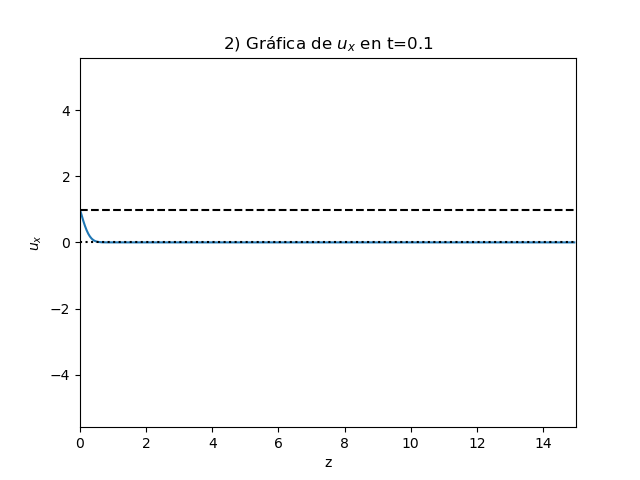

<IPython.core.display.Javascript object>


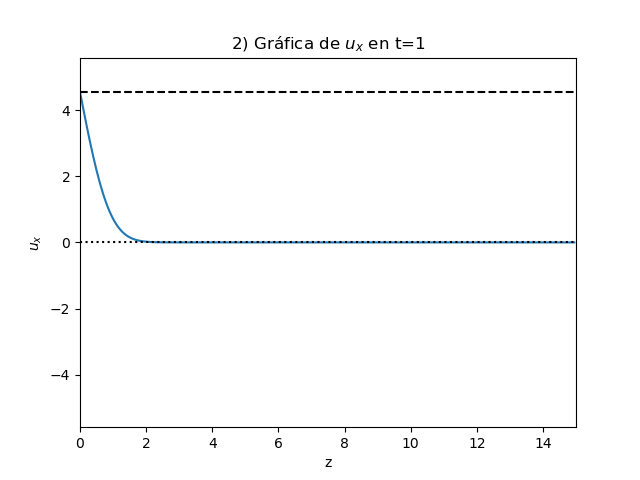

<IPython.core.display.Javascript object>


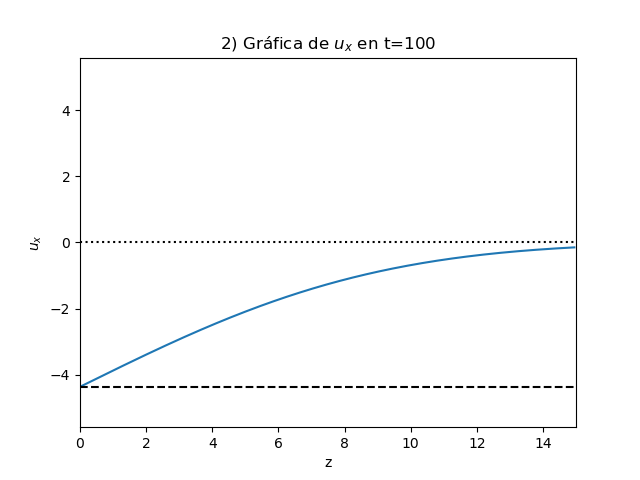

<IPython.core.display.Javascript object>


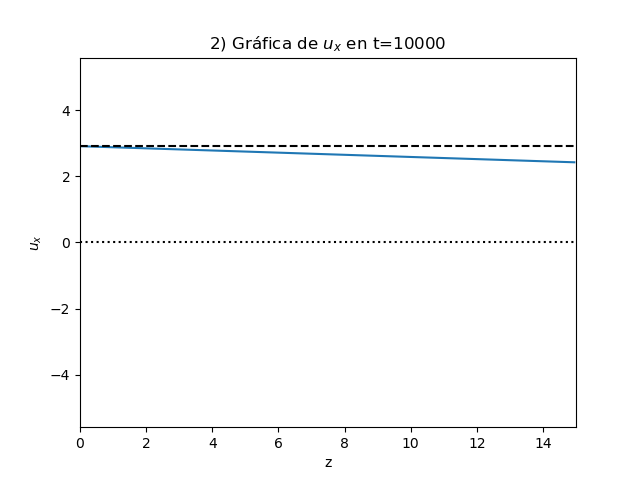

<IPython.core.display.Javascript object>


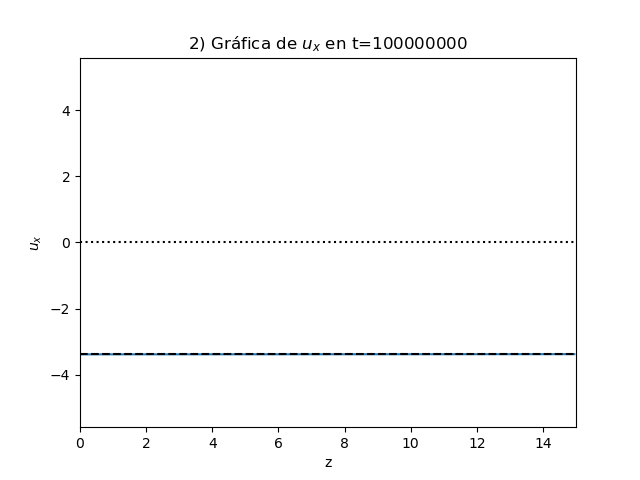

In [51]:
#GRAFICANDO LINEAS DE CORRIENTE
A=15
U=5
w=2
s=0.05
Z = np.arange(0, A, s)

for t in [0.1,1,100,10000,100000000]:
    ux = U*np.sin(w*t)*(1-sc.erf(Z/np.sqrt(t))) #Define ux como funcion en x, no pone la dependencia en y
    plt.figure()
    plt.plot(Z, ux)
    
    plt.axis('equal')
    plt.axis([0, A, -5, 5])
    plt.xlabel('z')
    plt.ylabel(r'$u_{x}$')
    plt.title(r'2) Gráfica de $u_{x}$ en t='+str(t))
    
    #GRAFICAS DE REFERENCIA
    ux=0+Z-Z
    plt.plot(Z,ux,'k:')
    
    ux=U*np.sin(w*t)+Z-Z 
    plt.plot(Z,ux,'k--')

    plt.show()
    


<IPython.core.display.Javascript object>


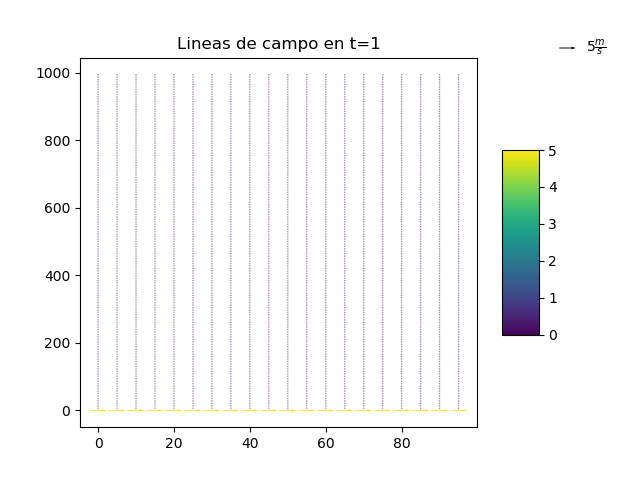

<IPython.core.display.Javascript object>


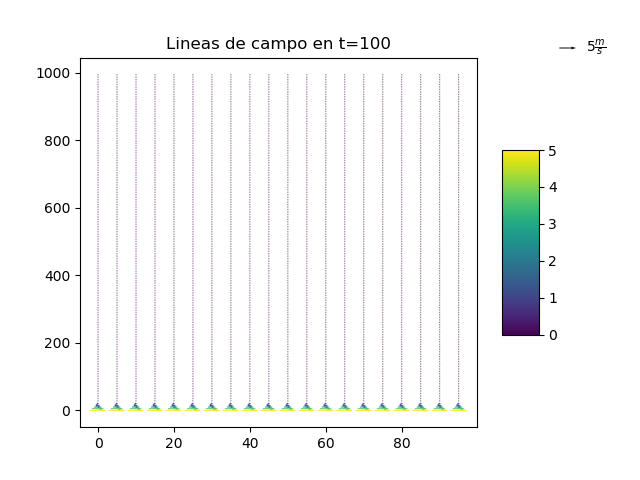

<IPython.core.display.Javascript object>


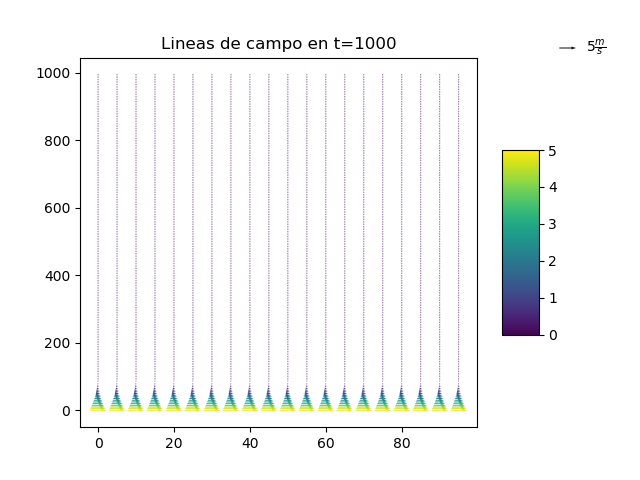

<IPython.core.display.Javascript object>


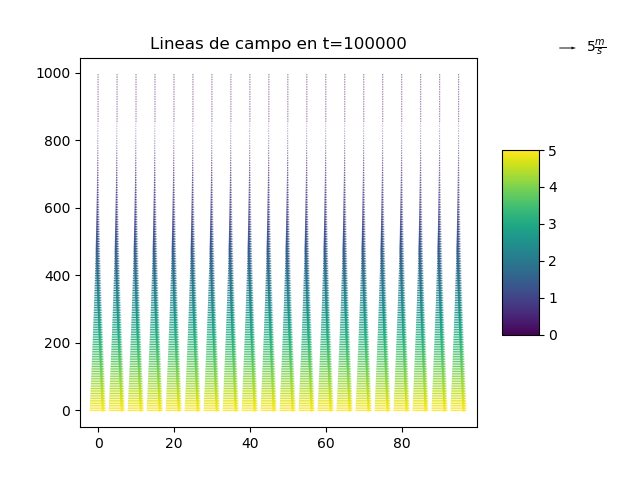

<IPython.core.display.Javascript object>


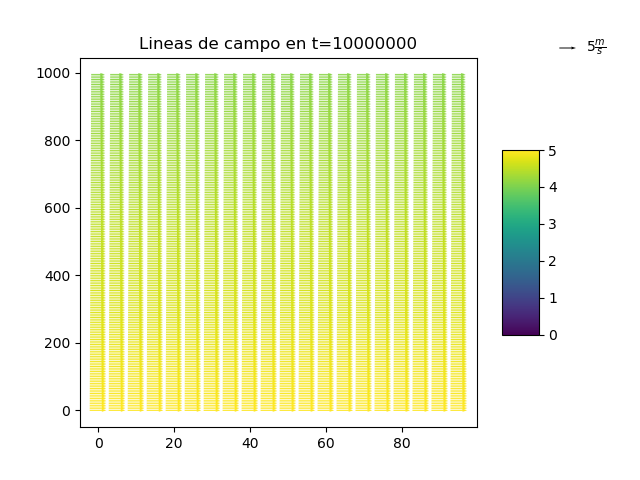

<IPython.core.display.Javascript object>


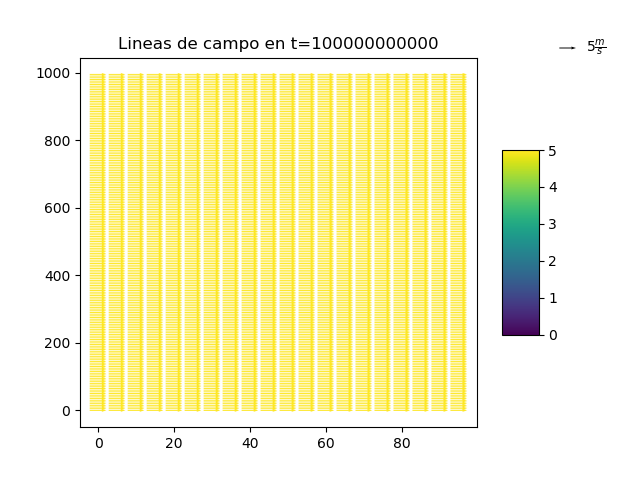

In [41]:
A=1000
B=100
s=5
X = np.arange(0, B, s)
Y = np.arange(0, A, s)

for t in [1,100,1000,100000,10000000,100000000000]:
    ux = 5*(1-sc.erf(Y/(2*np.sqrt(t)))) #Define ux como funcion en x, no pone la dependencia en y
    ux = np.tile(ux,(len(X),1)).T #Ahora sí es matriz
    uy = Y-Y
    uy = np.tile(uy,(len(X),1)) #Igual para uy
    
    plt.figure()
    M=np.hypot(ux,uy.T)
    Q=plt.quiver(X, Y, ux, uy, M, units="dots", pivot='mid',scale=0.3)
    plt.quiverkey(Q, 0.9, 0.9, 5, r'$5 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
    clb=plt.colorbar(shrink=0.5, aspect=5)
    plt.clim(0,5)
    plt.title('Lineas de campo en t='+str(t))
      
    plt.show()

<IPython.core.display.Javascript object>


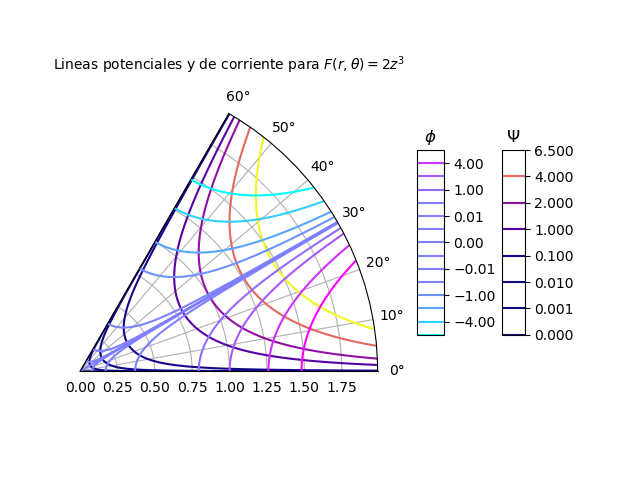

In [166]:
#GRAFICANDO LINEAS DE CORRIENTE Y EQUIPOTENCIALES
A=2
s=0.01
R = np.arange(0, A, s)
O = np.arange(0, np.pi/3+s, s)
R, O = np.meshgrid(R,O)

Psi=2*np.power(R,3)*np.sin(3*O)
contour_levels=[0,0.001,0.01,0.1,1,2.0,4.0,6.5]

phi=2*np.power(R,3)*np.cos(3*O)
phi_contour_levels=[-6.5,-4.0,-2.0,-1,-0.1,-0.01,-0.001,0,0.001,0.01,0.1,1,2.0,4.0,6.5]


fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))

CS = plt.contour(O, R, Psi, contour_levels, cmap=cm.plasma)
lb=plt.colorbar(shrink=0.5, aspect=8)
lb.ax.set_title(r'$\Psi$')
#plt.clabel(CS, inline=1, fontsize=10) #Para poner los valores en las lineas

CS = plt.contour(O, R, phi, phi_contour_levels, cmap=cm.cool)
lb=plt.colorbar(shrink=0.5, aspect=7, pad=0.1) #pad traslada el colorbar
lb.ax.set_title(r'$\phi$')
#plt.clabel(CS, inline=1, fontsize=10) #Para poner los valores en las lineas


plt.title(r'Lineas potenciales y de corriente para $F(r,\theta)=2z^3$',fontsize=10)

ax.set_thetamin(0)
ax.set_thetamax(60)

plt.show()

<IPython.core.display.Javascript object>


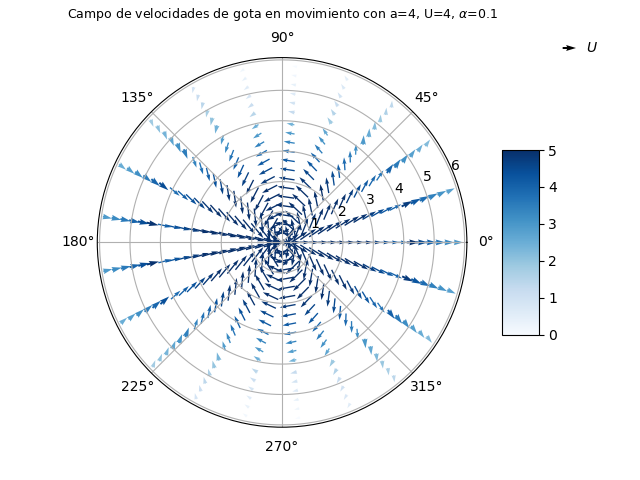

In [105]:
#CAMPO DE VELOCIDADES DE ADENTRO
a=4
s=0.3
R = np.arange(s, a, s)
O = np.arange(0, 2*np.pi, s)
R, O = np.meshgrid(R,O)

U=4
alpha=0.1

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))

ur=U*np.cos(O)*((3+2*alpha)*a**2-np.power(R,2))/(2*a**2*(1+alpha))
uo=U*np.sin(O)*((3+2*alpha)*a**2-2*np.power(R,2))/(2*a**2*(1+alpha))

M=np.hypot(ur,uo)
Q=plt.quiver(O, R, ur * np.cos(O) - uo * np.sin(O), ur * np.sin(O) + uo * np.cos(O), M, units="dots", pivot='mid',scale=0.3, cmap=cm.Blues)

clb=plt.colorbar(shrink=0.5, aspect=5,pad=0.07)
plt.clim(0,5)

#CAMPO DE VELOCIDADES DE AFUERA
R = np.arange(a+s, 1.5*a, s)
O = np.arange(0, 2*np.pi, s)
R, O = np.meshgrid(R,O)

vr=a*U*np.cos(O)*((2+3*alpha)-alpha*a**2/np.power(R,2))/(2*R*(1+alpha))
vo=a*U*np.sin(O)*((2+3*alpha)+alpha*a**2/np.power(R,2))/(4*R*(1+alpha))

M=np.hypot(vr,vo)
Q=plt.quiver(O, R, vr * np.cos(O) - vo * np.sin(O), vr * np.sin(O) + vo * np.cos(O), M, units="dots", pivot='mid',scale=0.3, cmap=cm.Blues)
plt.quiverkey(Q, 0.9, 0.9, U, r'$U$', labelpos='E',
                   coordinates='figure')

plt.title(r'Campo de velocidades de gota en movimiento con a='+str(a)+', U='+str(U)+r', $\alpha$='+str(alpha),pad=15,fontsize=9)

plt.show()

<IPython.core.display.Javascript object>


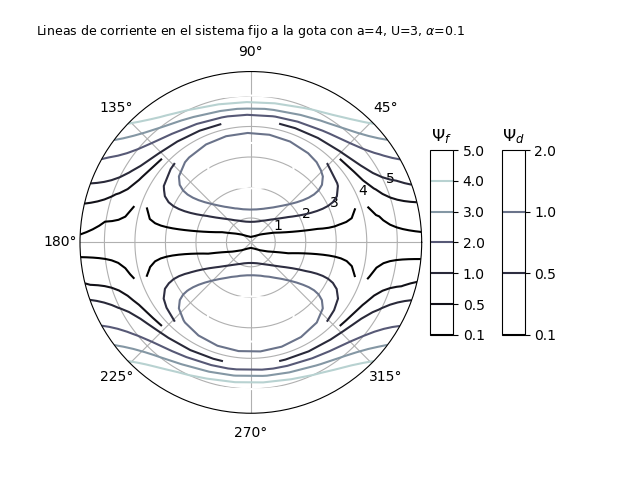

In [104]:
#GRAFICANDO LINEAS DE CORRIENTE Y EQUIPOTENCIALES
#ADENTRO
a=4
s=0.2
R = np.arange(s, a, s)
O = np.arange(0, 2*np.pi, s)
R, O = np.meshgrid(R,O)

U=3
alpha=0.1

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))

Psi=U*np.power(np.sin(O),2)*np.power(R,2)*(a**2-np.power(R,2))/(4*a**2*(1+alpha))
Psi_contour_levels=[0,0.1,0.5,1,2.0,3.0,4.0,5.0]

CS = plt.contour(O, R, Psi, Psi_contour_levels, cmap=cm.bone)
lb=plt.colorbar(shrink=0.5, aspect=8, pad=0.02)
lb.ax.set_title(r'$\Psi_{d}$')
#plt.clabel(CS, inline=1, fontsize=10) #Para poner los valores en las lineas

#AFUERA
R = np.arange(a+s, 1.5*a, s)
O = np.arange(0, 2*np.pi, s)
R, O = np.meshgrid(R,O)

Psi=U*np.power(np.sin(O),2)*a*(R-a**2/R)/(4*(1+alpha))
Psi_contour_levels=[0,0.1,0.5,1,2.0,3.0,4.0,5.0]

CS = plt.contour(O, R, Psi, Psi_contour_levels, cmap=cm.bone)
lb=plt.colorbar(shrink=0.5, aspect=8, pad=0.02)
lb.ax.set_title(r'$\Psi_{f}$')
#plt.clabel(CS, inline=1, fontsize=10) #Para poner los valores en las lineas

plt.title(r'Lineas de corriente en el sistema fijo a la gota con a='+str(a)+', U='+str(U)+r', $\alpha$='+str(alpha),pad=14,fontsize=9)

plt.show()